# CME538 - Introduction to Data Science
## Tutorial 3 - Parsing HTML

### Learning Objectives
After completing this tutorial, you should be comfortable:

- Understanding the overall structure of HTML tags
- Finding the information of interest within a web-page by going through the HTML source code
- Using Python and BeautifulSoup to extract the information of interest from HTML elements 

### Turtorial Structure
1. [What is HTML](#section1)
2. [Scraping imdb.com](#section2)
3. [Scraping indeed.com](#section3)

<a id='section1'></a>
# 1. What is HTML

source = https://www.w3schools.com/html/html_intro.asp

HTML stands for Hyper Text Markup Language

HTML is the standard markup language for creating Web pages

HTML describes the structure of a Web page

HTML consists of a series of elements

HTML elements tell the browser how to display the content

HTML elements label pieces of content such as "this is a heading", "this is a paragraph", "this is a link", etc

<div>
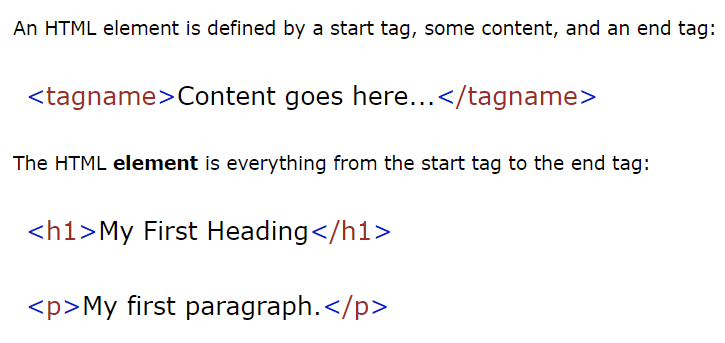
</div>

<div>
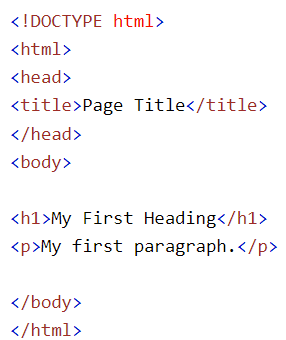
</div>

<div>
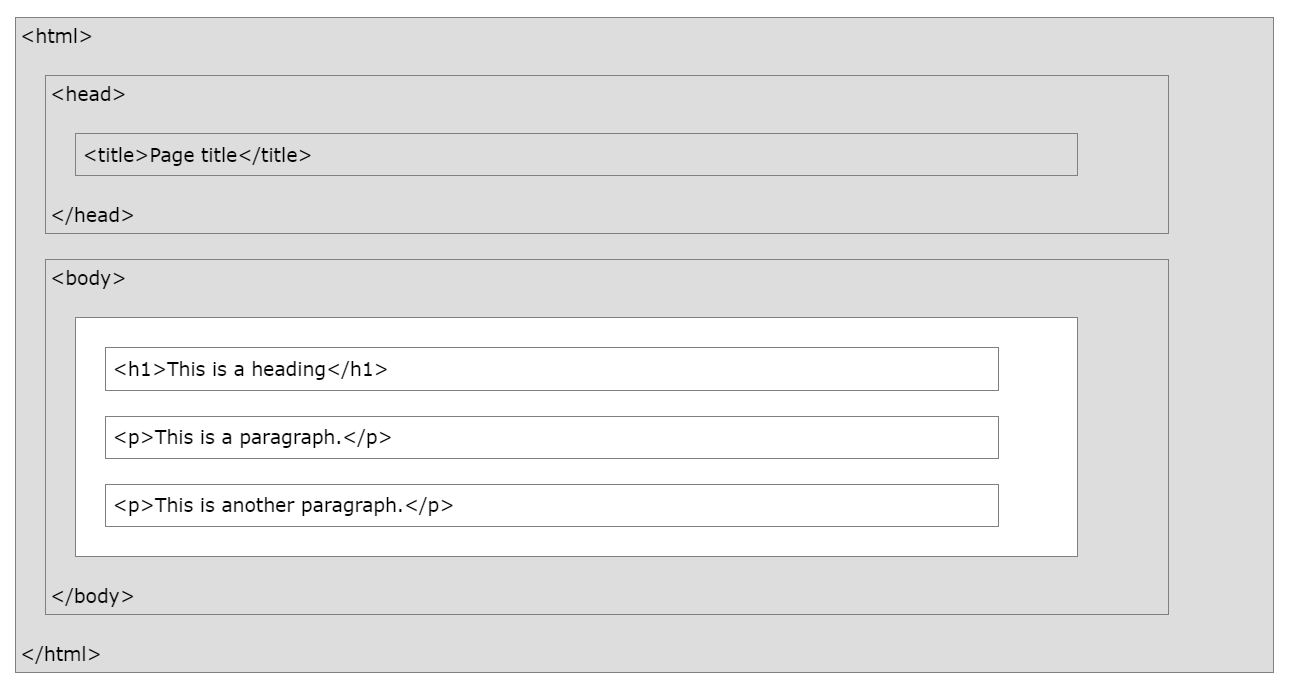
</div>

<a id='section2'></a>
# 2. Scraping imdb.com
'http://www.imdb.com/search/title?release_date=2017&sort=num_votes,desc&page=1'

In [1]:
from requests import get
response = get('http://www.imdb.com/search/title?release_date=2017&sort=num_votes,desc&page=1')

In [2]:
#let's see the text
response.text

'\n\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n\n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n        <title>Released between 2017-01-01 and 2017-12-31\n(Sorted by Number of Votes Descending) - IMDb</title>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>\n<script>\n    if (typeof uet == \'function\') {\n      uet("be", "LoadTitle", {wb: 1});\n    }\n</script>\n<script>\n    if (typeof uex == \'function\') {\n      uex("ld", "LoadT

###### To parse our HTML document, we’ll use a Python module called BeautifulSoup, the most common web scraping module for Python.

In [4]:
from bs4 import BeautifulSoup

In [5]:
html_soup = BeautifulSoup(response.text,'html')

In [6]:
#let's the type and visualize the result
html_soup

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>Released between 2017-01-01 and 2017-12-31
(Sorted by Number of Votes Descending) - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>
<link href="https://www.imdb.com/search/title/?release_date=2017-01-01,20

###### BeautifulSopup provides a method called find_all() that allows us to extract the elements we are interested in. To use it we need to tell it the name of the tag we are interested in, and we can give it some attributes to make it more specific. 

In [ ]:
help(html_soup.find_all)

In [8]:
result_set = html_soup.find_all('div',class_='lister-item mode-advanced')

first_movie = result_set[0]


In [9]:
first_movie

<div class="lister-item mode-advanced">
<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt3315342"></div>
</div>
<div class="lister-item-image float-left">
<a href="/title/tt3315342/"> <img alt="Logan" class="loadlate" data-tconst="tt3315342" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BYzc5MTU4N2EtYTkyMi00NjdhLTg3NWEtMTY4OTEyMzJhZTAzXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png" width="67"/>
</a> </div>
<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt3315342/">Logan</a>
<span class="lister-item-year text-muted unbold">(2017)</span>
</h3>
<p class="text-muted">
<span class="certificate">R</span>
<span class="ghost">|</span>
<span class="runtime">137 min</span>
<span class="ghost">|</span>
<span class="genre">
Action, Drama, Sci-Fi            </span>
<

###### first_movie is a Tag object, and the various HTML tags within it are stored as its attributes. We can access them just like we would access any attribute of a Python object. However, using a tag name as an attribute will only select the first tag by that name. If we run first_movie.div, we only get the content of the first div tag:

In [10]:
# try to export the tags treating them like python objects
first_movie.h3

<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt3315342/">Logan</a>
<span class="lister-item-year text-muted unbold">(2017)</span>
</h3>

In [11]:
# try to export the tags using the find_all function
first_movie.find_all('span')[0]

<span class="lister-item-index unbold text-primary">1.</span>

In [12]:
# we export the name of the movie
first_name = first_movie.h3.a.text

In [13]:
# we export the year of the movie
first_year = first_movie.h3.find_all('span')[1].text

In [14]:
# we export the imdb_score of the movie
first_imdb = first_movie.strong.text

In [15]:
# we export the meta score of the movie
first_metascore = first_movie.find('span',class_='metascore favorable').text

In [17]:
# we export the number of votes of the movie
first_votes = first_movie.find('span',attrs={'name':'nv'})['data-value']

##### Putting everything together, we can extract information of interest on each movie and store them in a single pandas dataframe

In [20]:
import pandas as pd

In [21]:
# Lists to store the scraped data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []
# Extract data from individual movie container
for movie in result_set:
    # If the movie has Metascore, then extract:
    if movie.find('span',class_='metascore favorable') is not None:
        
        name = movie.h3.a.text
        names.append(name)
        
        year = movie.h3.find_all('span')[1].text
        year = ''.join(x for x in year if x.isdigit())
        years.append(year)
        
        imdb_score = movie.strong.text
        imdb_ratings.append(imdb_score)
        
        meta_score = movie.find('span',class_='metascore favorable').text
        metascores.append(meta_score)
        
        vote = movie.find('span',attrs = {'name':'nv'})['data-value']
        votes.append(vote)
        

In [23]:
import pandas as pd

In [24]:
movie_df = pd.DataFrame({'movie_name':names,'release_year':year , 'imdb_score':imdb_ratings,
                        'meta_scores':metascores})

In [25]:
movie_df

,movie_name,release_year,imdb_score,meta_scores
0,Logan,2017,8.1,77
1,Thor: Ragnarok,2017,7.9,74
2,Guardians of the Galaxy Vol. 2,2017,7.6,67
3,Wonder Woman,2017,7.4,76
4,Dunkirk,2017,7.8,94
5,Spider-Man: Homecoming,2017,7.4,73
6,Star Wars: Episode VIII - The Last Jedi,2017,6.9,84
7,Get Out,2017,7.7,85
8,Blade Runner 2049,2017,8.0,81
9,It,2017,7.3,69


<a id='section3'></a>
# 3. Scraping indeed.com
#### now let's repeat the process for another URL

In [ ]:
URL = 'https://oxylabs.io/blog'
page = get(URL)
soup = BeautifulSoup(page.text,'html')

soup.find_all('div',class_='column is-6-tablet is-4-desktop')

In [ ]:
posts = soup.find_all('div',class_='column is-6-tablet is-4-desktop')
first_post = post[0]
first_post.p.text